In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

In [4]:
df_raw = pd.read_csv("/Users/eier/Documents/Norconsult/TrainAndValid.csv", parse_dates = ['saledate'], low_memory = False)

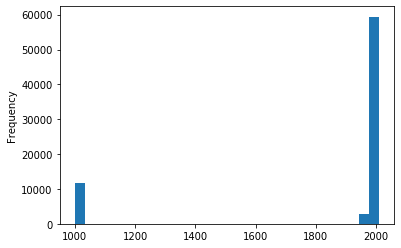

In [16]:
df_raw.query("MachineHoursCurrentMeter==0")['YearMade'].plot.hist(bins=30)


In [6]:
df_raw['Tire_Size'].unique()

array(['None or Unspecified', '23.5', nan, '13"', '26.5', '29.5', '14"',
       '20.5', '17.5"', '15.5"', '20.5"', '17.5', '7.0"', '15.5', '23.5"',
       '10"', '23.1"', '10 inch'], dtype=object)

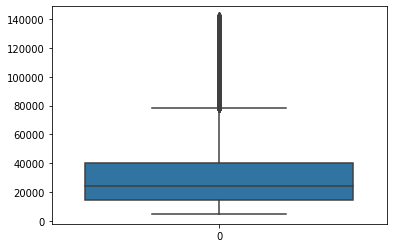

In [118]:
sns.boxplot(data=df_raw['SalePrice'])

Text(0.5, 0, 'Year')

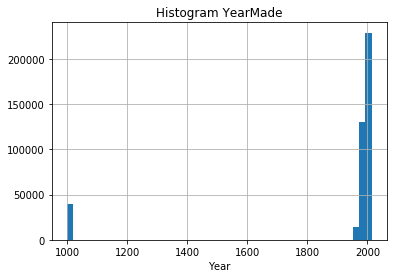

In [18]:
df_raw['YearMade'].hist(bins=50)
plt.title('Histogram YearMade')
plt.xlabel('Year')

In [22]:
df_raw.loc[df_raw.YearMade<1950, 'YearMade'] = np.nan
df_raw["YearMade"] = df_raw['YearMade'].fillna(df_raw["YearMade"].median())


Text(0.5, 0, 'Year')

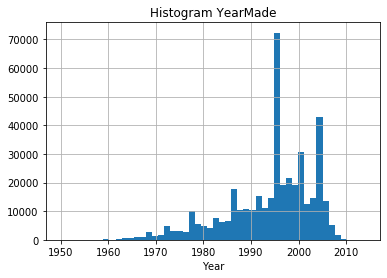

In [23]:
df_raw['YearMade'].hist(bins=50)
plt.title('Histogram YearMade')
plt.xlabel('Year')

In [13]:
max(df_raw['MachineHoursCurrentMeter'])

2483300.0

In [15]:
2483300/(24*365)

283.48173515981733

In [44]:
df_raw['ProductGroupDesc'].unique()

array(['Wheel Loader', 'Skid Steer Loaders', 'Track Excavators',
       'Backhoe Loaders', 'Track Type Tractors', 'Motor Graders'],
      dtype=object)

In [55]:
df_raw['fiModelDescriptor'].unique()

array([nan, 'LC', '6', 'L', 'LT', 'CR', 'SB', 'XL', 'LGP', 'VHP', '7',
       'Z', '2.00E+00', 'MC', 'H', 'E', '3', 'LK', '5', 'K', '8', 'HT',
       'LX', 'XLT', 'XW', 'HSD', '2', 'XR', 'TC', 'LCR', 'TLB', 'WT',
       'TURBO', 'U', '4WD', 'XT', 'LRC', 'ZTS', 'RTS', 'TP', 'LE', 'LRR',
       'SA', '3C', 'SR', 'XP', '1', 'BE', '3NO', 'CRSB', 'N', 'SSR',
       'DHP', 'LM', ' SUPER', 'KA', 'H5', 'II', 'MH', 'P', 'LU', 'DT',
       'XTV', 'LR', 'ZX', 'LL', 'V', 'DELUXE', 'USLC', 'SU', 'SRDZ', 'C',
       'PRO', 'PLUS', 'SITEMASTER', 'DINGO', '3.00E+00', ' XLT', 'LN',
       'AE0', 'SERIES3', '7.00E+00', 'ESL', 'A', 'G', 'B', 'DLL', 'CK',
       'NSUC', 'LS', 'SLGP', 'RR', 'WLT', 'LCRTS', 'X', 'LCH', 'T', 'NLC',
       'SM', 'SE', 'TM', 'SRLC', 'CUSTOM', 'HD', 'DW', 'LC8', ' LGP',
       'TK', 'HF', 'SUPER K', 'IV', ' XT', 'IT', 'XLVP', 'LGPVP', 'K5',
       '3L', '7A', 'XD', 'DA', 'Y', 'S', 'M', '6K', 'LITRONIC', 'KBNA',
       ' 14FT', '2N', 'III', 'ME', 'High Lift', 'HighLift', 'VHP/AW

In [95]:
df_raw['fiBaseModel'].unique()

array(['521', '950', '226', ..., '336', 'WLK15', 'R964'], dtype=object)

In [53]:
df_raw['Differential_Type'].unique()

array(['Standard', nan, 'Limited Slip', 'No Spin', 'Locking'],
      dtype=object)

In [56]:
df_raw['Steering_Controls'].unique()

array(['Conventional', nan, 'Command Control', 'Four Wheel Standard',
       'Wheel', 'No'], dtype=object)

In [83]:
df_raw['Engine_Horsepower'].unique()

array([nan, 'No', 'Variable'], dtype=object)

In [88]:
df_raw['Coupler'].unique()

array(['None or Unspecified', nan, 'Manual', 'Hydraulic'], dtype=object)

In [62]:
df_split = df_raw.fiProductClassDesc.str.split(' - ',expand=True).values


In [66]:
df_split[:,0]

array(['Wheel Loader', 'Wheel Loader', 'Skid Steer Loader', ...,
       'Hydraulic Excavator, Track', 'Hydraulic Excavator, Track',
       'Hydraulic Excavator, Track'], dtype=object)

In [70]:
df_split[:,1]

array(['110.0 to 120.0 Horsepower', '150.0 to 175.0 Horsepower',
       '1351.0 to 1601.0 Lb Operating Capacity', ...,
       '2.0 to 3.0 Metric Tons', '2.0 to 3.0 Metric Tons',
       '3.0 to 4.0 Metric Tons'], dtype=object)

In [75]:
len(df_raw['fiModelSeries'].unique())

124

In [89]:
x['auctioneerID'] =  df['auctioneerID'].fillna(x['auctioneerID'].value_counts().index[0])
x.loc[:,'Ride_Control'] = pd.factorize(df['Ride_Control'])[0].reshape(-1,1)
x['fiSecondaryDesc'] =  df['fiSecondaryDesc'].fillna(x['fiSecondaryDesc'].value_counts().index[0])

x['state'] =  df['state'].fillna(x['state'].value_counts().index[0])

x['Enclosure'] =  df['Enclosure'].fillna(x['Enclosure'].value_counts().index[0])

x['Hydraulics'] = df['Hydraulics'].fillna(x['Hydraulics'].value_counts().index[0])

sizes_PS = {np.nan:-1, 'Mini':1, 'Compact':1, 'Small':2, 'Medium':3,
         'Large / Medium':4, 'Large':5}
x['ProductSize'] = df['ProductSize'].map(sizes_PS).values

x['Transmission'] = df['Transmission'].fillna('T_nan')

x['Drive_System'] = df['Drive_System'].fillna('DS_nan')

x.loc[:,'Stick'] = pd.factorize(df['Stick'])[0].reshape(-1,1)

x['fiModelDescriptor'] = df['fiModelDescriptor'].fillna('fMD_nan')

x['Steering_Controls'] = df['Steering_Controls'].fillna('SC_nan')

x['fiModelSeries'] = df['fiModelSeries'].fillna('fMS_nan')

x['Ripper'] = df['Ripper'].fillna('Rip_nan')

x['Tire_Size'] = df['Tire_Size'].str.replace(r'\D+','')
x['Tire_Size'] = x['Tire_Size'].replace('', np.nan)
x["Tire_Size"] = x["Tire_Size"].astype(float)
x['Tire_Size'] = x['Tire_Size'].fillna(-1)

x.loc[:,'Hydraulics_Flow'] = pd.factorize(df['Hydraulics_Flow'])[0].reshape(-1,1)



#x['Differential_Type'] = x['Differential_Type'].fillna('DT_nan')

#sizes_UB = {np.nan:-1, 'Low':0, 'Medium':1, 'High':2}
#x['UsageBand'] = df['UsageBand'].map(sizes_UB).values

#Change format of saledate
x["saledate"] = x["saledate"].astype(str)
x_date = x["saledate"].str.split("-",n = 3, expand = True)
x_date
x["SaleYear"] = x_date[0].astype(int)

#Gjør om salemoth to syklisk slik at 12 ligger nærme 0 
x["SaleMonth"] = x_date[1].astype(int)


x["SaleDay"] = x_date[2].astype(int)


x.loc[df.YearMade<1950, 'YearMade'] = np.nan

x["YearMade"] = x['YearMade'].fillna(df["YearMade"].median())

x["YearsOld"] = x["SaleYear"] - x["YearMade"] + x['SaleMonth']/12



#Grouser_Type --> nei
#x.loc[:,'Grouser_Type'] = pd.factorize(df['Grouser_Type'])[0].reshape(-1,1)

#Track_Type --> nei

#x.loc[:,'Track_Type'] = pd.factorize(df['Track_Type'])[0].reshape(-1,1)
#sum(df['Track_Type'] == 'Steel')/len(df['Track_Type'])

#sum(df['Track_Type'] == 'Rubber')
#df[df['Track_Type'] == 'Steel']['SalePrice'].hist()
#df[df['Track_Type'] == 'Rubber']['SalePrice'].hist()

final_features = x.columns

#x['Transmission'] = x['Transmission'].fillna('T_nan')

#x.query("MachineHoursCurrentMeter==0")['YearMade'].plot.hist(bins=30)
#Unlikley that machines made in 1980 has not been used
#So most likley --> = 0 means theres no data

#df.loc[df.eval("MachineHoursCurrentMeter==0"),
#       'MachineHoursCurrentMeter'] = np.nan

#1-df['MachineHoursCurrentMeter'].isnull().sum()/len(df['MachineHoursCurrentMeter'])



x['MachineHoursCurrentMeter'] = df['MachineHoursCurrentMeter'].fillna(x['MachineHoursCurrentMeter'].mean())
#x['MachineHoursCurrentMeter'] = x['MachineHoursCurrentMeter'].fillna(-1)
#x['MachineHoursCurrentMeter'] = x['MachineHoursCurrentMeter'].fillna(x['MachineHoursCurrentMeter'].median())

#Split into numerical and categorical features



NameError: name 'df' is not defined